In [1]:
from dtcs.bulk_crn import *
from dtcs.spec.crn import *
from dtcs.bulk_crn.xps_io import *
from dtcs.bulk_crn.solution_system import *

import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.signal as signal
from mpl_toolkits.axes_grid1 import ImageGrid


In [2]:
# 1e-6_rt
sols = []
sm = SpeciesManager()

#[535.0 , 532.2 , 530.9 , 530.0 , 531.6 ,  531.6 ,  533.2, 535.0]
#[y1, x2, x3, x4, x53, x54, x6, x7]
y1 = sm.sp('y1', Orbital('1s', 535.0))
x2 = sm.sp('x2', Orbital('1s', 532.2))
x3 = sm.sp('x3', Orbital('1s', 530.9))
x4 = sm.sp('x4', Orbital('1s', 530.0))
x53 = sm.sp('x53', Orbital('1s', 531.6))
x54 = sm.sp('x54', Orbital('1s', 531.6))
x6 = sm.sp('x6', Orbital('1s', 533.2))
x7 = sm.sp('x7', Orbital('1s', 535.0))

multipliers = [0.1, 0.5, 1, 5, 10]
default_rxn_consts = [0.236191, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.116930, 0.152889, 3.270343, 0.329519, 1.111032]

# System Solving

In [8]:
# Test code that will be moved into a module
for i in range(len(default_rxn_consts)):
    for j in range(5):
        scaled = list(default_rxn_consts)
        scaled[i] *= multipliers[j]
        
        rsys = RxnSystem(
            Rxn(x4 + y1, x54, scaled[0]), # 0
            Rxn(x3 + y1, x53, scaled[1]), # 1
            Rxn(x54, x3 + x3, scaled[2]), # 2
            Rxn(x3 + x3, x54, scaled[3]), # 3
            Rxn(x53, x2 + x3, scaled[4]), # 4
            Rxn(x54, x2 + x4, scaled[5]), # 5
            Rxn(x2, y1, scaled[6]), # 6
            Rxn(y1, x2, scaled[7]), # 7
            Rxn(x53, y1 + x3, scaled[8]), # 8
            Rxn(x54, x4 + y1, scaled[9]), # 9
            Rxn(x53 + y1, x6, scaled[10]), # 10
            Rxn(x6, x53 + y1, scaled[11]), # 11
            Rxn(x4 + x4, x7, scaled[12]), # 12
            Rxn(x7, x4 + x4, scaled[13]), # 13
            Conc(y1, 1.0),
            Conc(x4, 0.25),
            sm
        )
        s = simulate_xps(rsys, time=10000)
        sols.append(s)
        print('Solved for ('+str(i)+', '+str(j)+')')
        print(scaled)
        print('\n')

Solved for (0, 0)
[0.023619100000000004, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 3.270343, 0.329519, 1.111032]


Solved for (0, 1)
[0.1180955, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 3.270343, 0.329519, 1.111032]


Solved for (0, 2)
[0.236191, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 3.270343, 0.329519, 1.111032]


Solved for (0, 3)
[1.180955, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 3.270343, 0.329519, 1.111032]


Solved for (0, 4)
[2.36191, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 3.270343, 0.329519, 1.111032]


Solved for (1, 0)
[0.236191, 0.0169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 3.270343, 0.329519, 1.111032]


Solved for (1, 1)
[0.236191

KeyboardInterrupt: 

In [5]:
import pickle
with open('../ag_highp_hight_v2.pkl', 'wb') as f:
    pickle.dump(sols, f)

# Analysis

In [3]:
sols = pickle.load(open('../data/ag_highp_hight_v2.pkl', 'rb'))

In [4]:
x = read_new_data('../data/ag_100e-3_300.txt', be=0)[0]
for i, s in enumerate(sols):
    s.ignore = []
    series = pd.Series(data=x.intensity, index=x.binding_energy)
    s.experimental = series

0.8300797586653645
0.7853405387637719
0.7588008122034371
0.6919733989520818
0.6686518456799075
0.7684177502874397
0.764081362870118
0.7588008122034371
0.7214035001789914
0.6837470519668487
0.818005336251517
0.780906851325299
0.7588008122034371
0.700054084509941
0.6771012713184948
0.6771038206930182
0.7339236093911438
0.7588008122034371
0.804460295393633
0.8180136478963763
0.7578655254166972
0.7583222242793138
0.7588008122034371
0.7608761235035181
0.7618945943256717
0.7519175575679039
0.7551562390201769
0.7588008122034371
0.7784007757043659
0.7918330054693096
0.6111275603974732
0.7388429720959895
0.7588008122034371
0.7755822907049528
0.7777316744725566
0.7759658474887795
0.7682391979309277
0.7588008122034371
0.6911027453864166
0.6221158176447783
0.7311722731349894
0.7516532829958396
0.7588008122034371
0.7669670471712619
0.7682113762283523
0.7041142589776196
0.7370829868766484
0.7588008122034371
0.8092366827163939
0.8260582168210363
0.7593513498219387
0.7591059789283005
0.758800812203437

In [5]:
for s in sols:
    s.ignore = [y1]
    s.gas_interval = (534, 536)

0.17545384835891922
0.1662485864050099
0.19916927562335765
0.2889033414726339
0.32022865980419024
0.20057514012774838
0.1999376031735473
0.19916927562335765
0.1941109270272274
0.19108516846424597
0.16676071772408174
0.1640551483160854
0.19916927562335765
0.30184551739437315
0.34374696444518016
0.3437466341664168
0.24105592671417606
0.19916927562335765
0.1622823503474125
0.1667571418299797
0.19895012292283043
0.199049032532395
0.19916927562335765
0.1996634401626037
0.1999018139102446
0.20930614416745214
0.2045335047990993
0.19916927562335765
0.17120916411053122
0.16376361363258735
0.18944307498065205
0.197871708165405
0.19916927562335765
0.20023674358509702
0.20037121102781455
0.2002591497123122
0.19977258680524268
0.19916927562335765
0.1946369915958805
0.18948361851591955
0.19511722117113336
0.1981204637303273
0.19916927562335765
0.20036816490452772
0.20054935051149836
0.2725182117376179
0.22733035432028945
0.19916927562335765
0.16751236413043735
0.17395960911695027
0.19928796124716142

In [8]:
for s in sols:
    s.resample(overwrite=True)

0.17545384835891922
0.1662485864050099
0.19916927562335765
0.2889033414726339
0.32022865980419024
0.20057514012774838
0.1999376031735473
0.19916927562335765
0.1941109270272274
0.19108516846424597
0.16676071772408174
0.1640551483160854
0.19916927562335765
0.30184551739437315
0.34374696444518016
0.3437466341664168
0.24105592671417606
0.19916927562335765
0.1622823503474125
0.1667571418299797
0.19895012292283043
0.199049032532395
0.19916927562335765
0.1996634401626037
0.1999018139102446
0.20930614416745214
0.2045335047990993
0.19916927562335765
0.17120916411053122
0.16376361363258735
0.18944307498065205
0.197871708165405
0.19916927562335765
0.20023674358509702
0.20037121102781455
0.2002591497123122
0.19977258680524268
0.19916927562335765
0.1946369915958805
0.18948361851591955
0.19511722117113336
0.1981204637303273
0.19916927562335765
0.20036816490452772
0.20054935051149836
0.2725182117376179
0.22733035432028945
0.19916927562335765
0.16751236413043735
0.17395960911695027
0.19928796124716142

In [6]:
systems = [sols]
sys = SolutionSystem(*systems)

scaling factor: 1026.4579642139545 	max index: -1


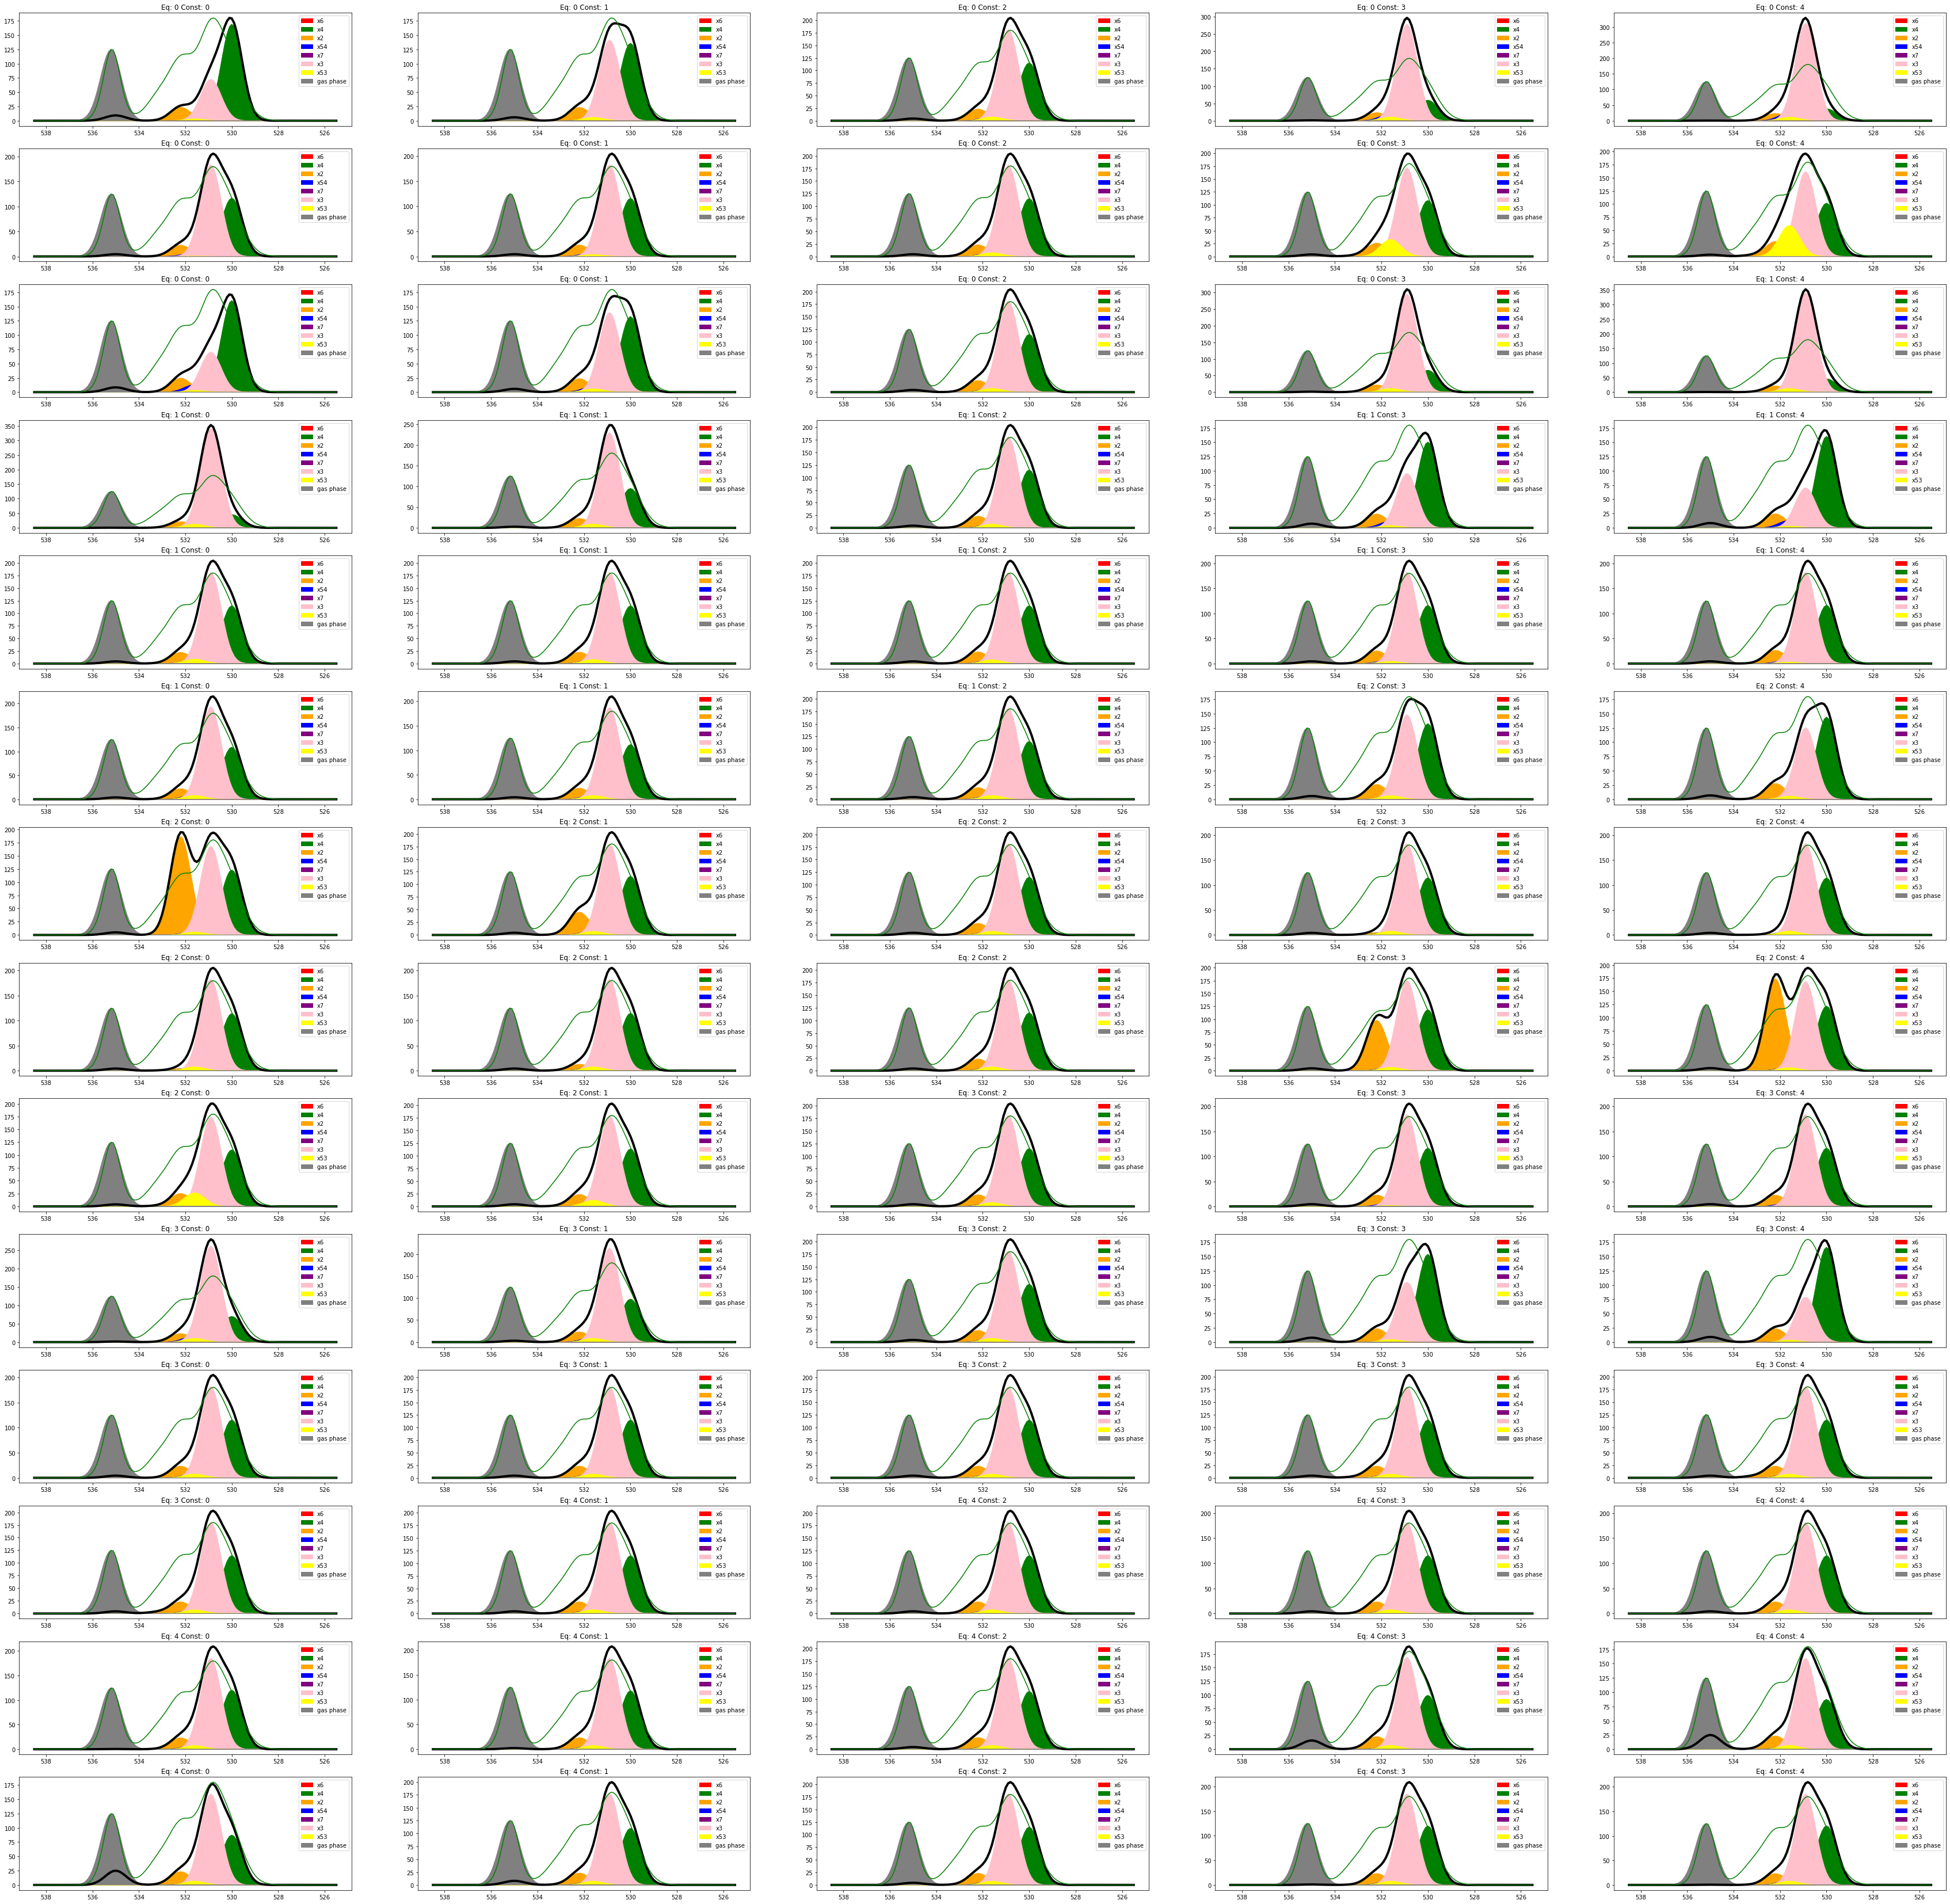

In [7]:
sys.plot(0, rows=14, cols=5)

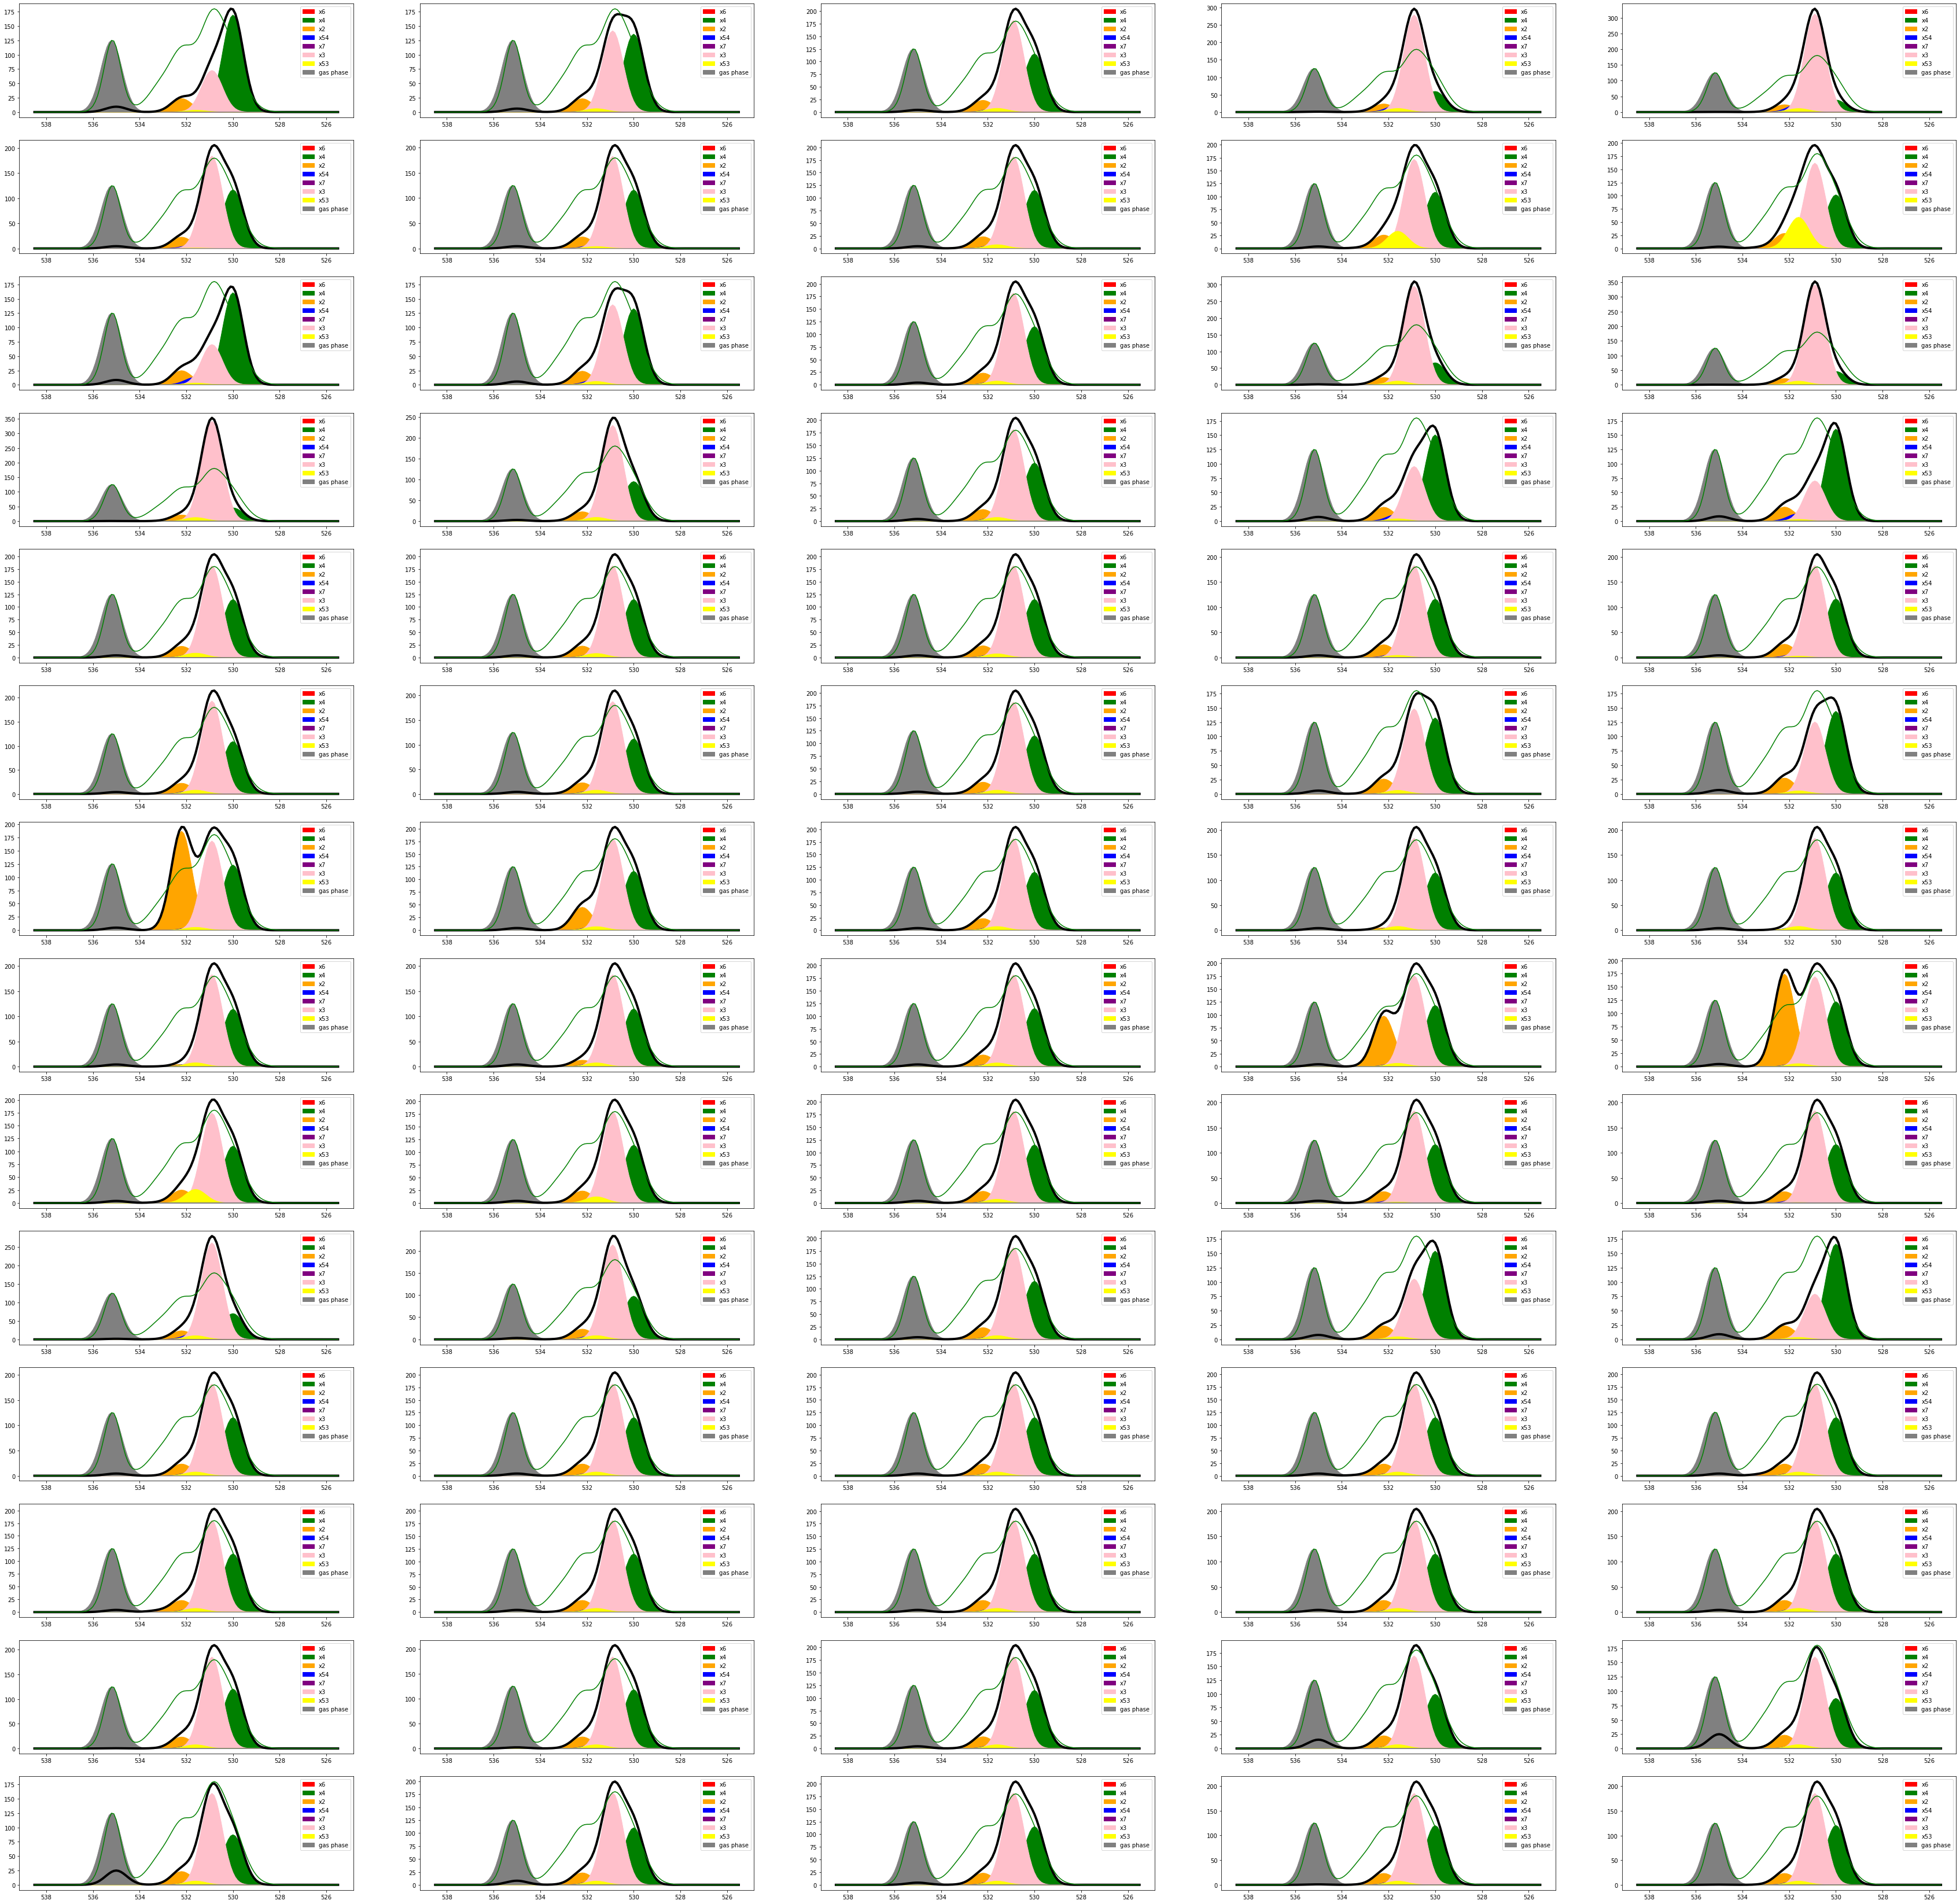

In [8]:
fig, axes = plt.subplots(nrows=14, ncols=5, figsize=(60,60))
for i in range(len(sols)):
    sols[i].plot(exp_type="spectro", envelope=True, ignore=[y1], ax=axes[int(i/5), int(i%5)], title=('Eq: ' + str(int(i/5)) + ' Const: ' + str(i % 5)))
plt.show()

# RMSE

In [8]:
rmses_list = []
for i in range(len(default_rxn_consts)):
    rmses_list.append([])
    for j in range(5):
        rmses_list[i].append(sols[i*5 + j].rmse())
rmses = pd.DataFrame(rmses_list, columns=['0.1', '0.5', '1', '5', '10'])
rmses

0.1        0.5          1          5         10
0   39.417840  29.776188  28.191984  32.327517  34.171845
1   29.207390  28.747054  28.191984  24.540238  21.810281
2   36.534644  28.696885  28.191984  33.489696  35.611771
3   35.612224  30.063407  28.191984  32.785722  36.536211
4   28.206872  28.199440  28.191984  28.163848  28.153001
5   28.509668  28.339223  28.191984  28.655286  30.480447
6   17.149465  23.965123  28.191984  31.824824  32.293093
7   31.908335  30.229454  28.191984  15.131766  15.375743
8   25.419836  27.451312  28.191984  29.053155  29.185529
9   31.355414  28.907673  28.191984  34.066449  38.314517
10  28.225497  28.210561  28.191984  28.044937  27.865712
11  27.865870  28.154942  28.191984  28.221713  28.225439
12  28.328313  28.261411  28.191984  27.971544  28.072033
13  28.072018  28.090475  28.191984  28.310418  28.328299

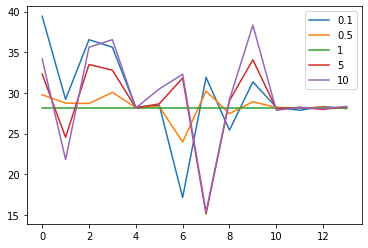

In [9]:
rmses.plot()

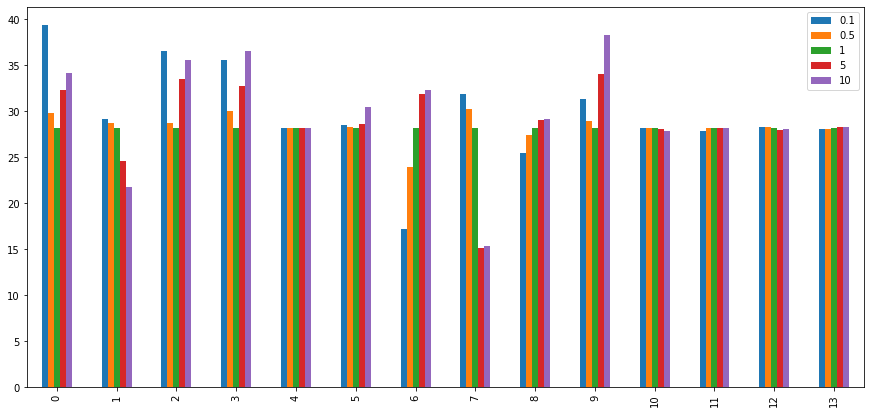

In [10]:
rmses.plot.bar(figsize=(15,7))

In [11]:
rmses_min = rmses.agg(['min', 'idxmin']).T
rmses_min

min  idxmin
0.1  17.149465     6.0
0.5  23.965123     6.0
1    28.191984     0.0
5    15.131766     7.0
10   15.375743     7.0

6, 0.1
0.2889033414726339


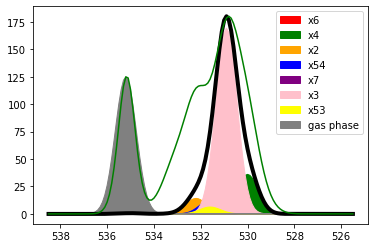

In [15]:
print('6, 0.1')
sols[3].plot()
#print('0, 1')
#sols[2].plot(envelope=True, overlay=True, resample_envelope=True)
#print('7, 10')
#sols[39].plot(envelope=True, overlay=True, resample_envelope=True)

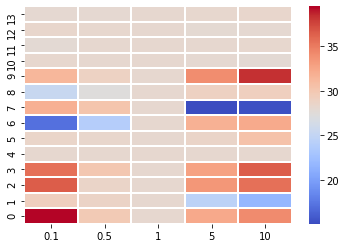

In [12]:
rmse_heatmap = sb.heatmap(rmses, cmap='coolwarm', linewidths=1)
rmse_heatmap.invert_yaxis()

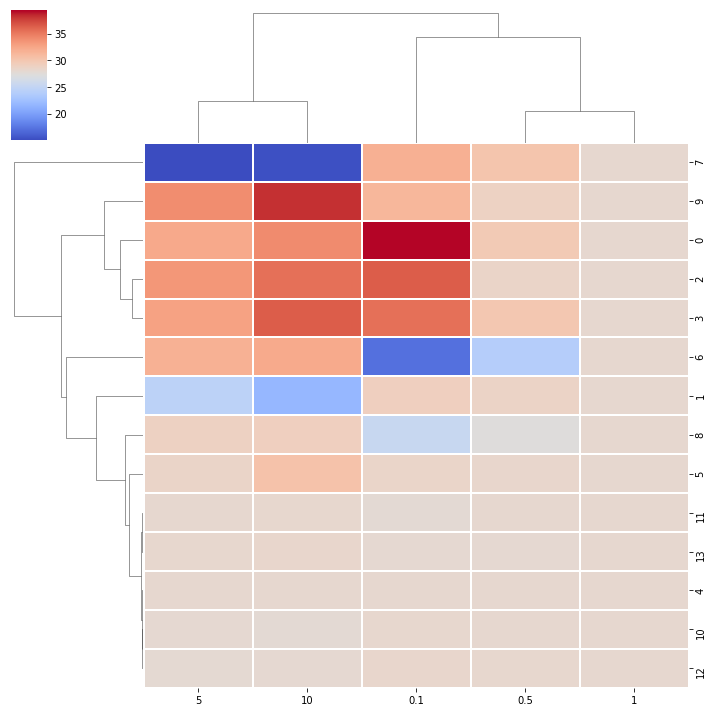

In [13]:
rmse_clustermap = sb.clustermap(rmses, cmap='coolwarm', linewidths=1)

## Between Integral Difference

In [6]:
integrals_list = []
for i in range(len(default_rxn_consts)):
    integrals_list.append([])
    for j in range(5):
        integrals_list[i].append(sols[i*5 + j].integral_diff_between())
integral_diffs = pd.DataFrame(integrals_list, columns=['0.1', '0.5', '1', '5', '10'])
integral_diffs

0.1         0.5           1           5          10
0   306.344014  222.504579  188.099015  247.476335  262.899119
1   194.633732  191.697301  188.099015  163.712386  149.222648
2   288.304191  214.322404  188.099015  254.284450  272.271732
3   272.274461  217.812305  188.099015  259.545238  288.314752
4   187.836159  187.961806  188.099015  188.680303  188.964246
5   192.210353  188.347372  188.099015  212.117588  235.575555
6   121.657446  166.879110  188.099015  205.735633  207.980159
7   206.135744  198.042751  188.099015  115.606722  112.721742
8   169.512091  183.195955  188.099015  193.655343  194.495318
9   238.328729  206.769975  188.099015  266.030154  298.462306
10  188.339360  188.232745  188.099015  187.040161  185.733297
11  185.732787  187.832426  188.099015  188.313551  188.340273
12  189.376830  188.723483  188.099015  186.348686  189.553535
13  189.552936  186.991039  188.099015  189.202033  189.377611

In [7]:
integral_diffs_min = integral_diffs.agg(['min', 'idxmin']).T
integral_diffs_min

min  idxmin
0.1  121.657446     6.0
0.5  166.879110     6.0
1    188.099015     0.0
5    115.606722     7.0
10   112.721742     7.0

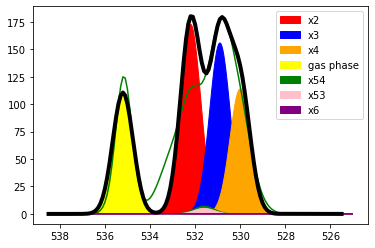

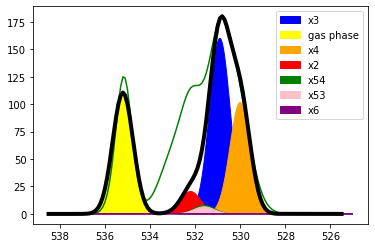

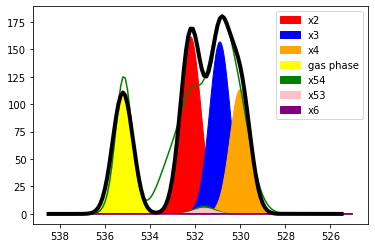

In [9]:
sols[30].plot_gaussian(envelope=True, overlay=True, resample_envelope=True)
sols[2].plot_gaussian(envelope=True, overlay=True, resample_envelope=True)
sols[39].plot_gaussian(envelope=True, overlay=True, resample_envelope=True)